### IS727272 - Cordero Hernández, Marco Ricardo

# Practice 4.4.1 K-Means

The K-Means is numerical, unsupervised, non-deterministic and iterative method.

The algorithm to be used is an iterative process of:

1. Assign a centroid to each register $x^{(i)}$, using the minimal distance
2. Update the Centroid 


In [1]:
# Import libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

## 1. Dataset

For this exercise we will use a dataset from the sklearn libraries which can be modified with certain parameters.

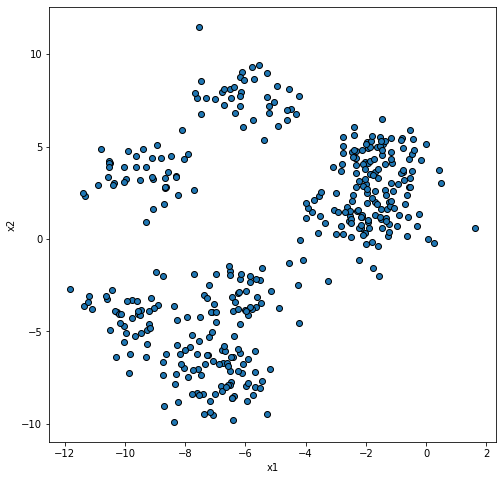

In [2]:
X, label = make_blobs(n_samples = 400, centers = 10, n_features = 2, random_state = 1, cluster_std = 0.99)
m, n = X.shape
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2');

## 2. Euclidean distance

To calculate the minimal distance from each register to the centroid we will use the euclidean distance:

$$
d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} = \lVert p - q \rVert
$$

**Euclidean Squared distance** metric is faster than clustering with the regular Euclidean distance. 

$$
\lVert p - q \rVert^2
$$

In [3]:
def dist(p, q):
    diff = p - q
    return np.dot(diff.T, diff) # d

In [4]:
# Testing distance function
dist(np.array([2,-1]), np.array([-2,2]))

25

Expected output:

```
25
```

### Find the minimum distance 

For a given $x^{(i)}$:

$$
c_i = arg \min_{j} \lVert x^{(i)} - \mu_j \rVert ^2
$$

In [5]:
def min_dist(xi, mu):
    ''' return the index of the cluster closest to the x_i '''
    c = []
    k, n = mu.shape
    
    for i in range(k):
        c.append(dist(xi, mu[i]))
    
    indx = np.argmin(c)
    
    return indx

In [6]:
def min_dist_all(x, mu):
    m, n = x.shape
    c = np.zeros(m, dtype = int)
    
    for i in range(m):
        c[i] = min_dist(x[i], mu)
    
    return c

tmp=array([[-8.27242914, -5.72835314],
       [-8.23537713, -8.81232508],
       [-6.41242289, -9.76439206],
       [-5.67141758, -8.02541754],
       [-6.82463944, -7.95341623],
       [-6.78702376, -8.22560968],
       [-8.38351433, -9.89630978],
       [-7.60519861, -8.35007759],
       [-8.17280643, -6.21670999],
       [-5.17927006, -7.05328197]])
idx=array([8, 9])
c=[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]


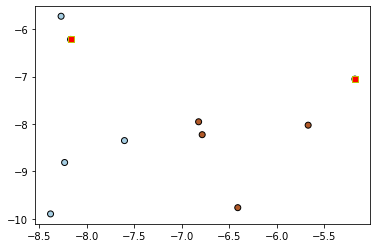

In [7]:
# Testing the functions

np.random.seed(3)

tmp = X[label == 2][:10]
print(f'{tmp=}')

k = 2
m = tmp.shape[0]
idx = np.random.choice(m, k)
print(f'{idx=}')

mu = tmp[idx]
c = [min_dist(tmp[i], mu) for i in range(m)]
print(f'{c=}')

plt.scatter(tmp[:, 0], tmp[:, 1], c=c, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(tmp[idx, 0], tmp[idx, 1], color='r', edgecolors='y', marker='s');

Expected output:

```
[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
```

## 3.  Compute or move the centroids means

for each $k \in  K$:

$$
\mu_k = \frac{\sum_{i=1}^{m} x_i[c_i = k]}{len[c_i = k]}
$$

In [8]:
# c is a numpy array
def move_centroids(x, c, k, mu):
    m, n = x.shape
    new_mu = np.zeros((k, n))
    
    for i in range(k):
        elements = x[c == i] # Elements with same centroids
        # if (not len(elements)): new_mu[i] = mu[i]
        # else: new_mu[i] = np.sum(elements, axis = 0) / len(elements)
        new_mu[i] = mu[i] if (not len(elements)) else np.sum(elements, axis = 0) / len(elements)
    
    return new_mu

In [9]:
# Testing the function move_centroids()
new_mu = move_centroids(tmp, np.array(c), k, mu)
print('mu \n', mu)
print('new \n', new_mu)

mu 
 [[-8.17280643 -6.21670999]
 [-5.17927006 -7.05328197]]
new 
 [[-8.13386513 -7.80075512]
 [-6.17495475 -8.2044235 ]]


Expected output

```
mu 
 [[-8.17280643 -6.21670999]
 [-5.17927006 -7.05328197]]
new 
 [[-8.13386513 -7.80075512]
 [-6.17495475 -8.2044235 ]]
```

## 4. Optimization objective

$$
J(c_1, \cdots, c_m, \mu_1, \cdots, \mu_k) = \frac{1}{m} \sum_{i=1}^{m} \lVert  x_i - \mu_{c_i} \rVert^2
$$

In [10]:
def cost(x, c, mu):
    m, n = x.shape
    r = np.array([dist(x[i], mu[c[i]]) for i in range(m)])
    
    # for i in range(m):
    #     idx = c[i]
    #     r.append(dist(x[i], mu[idx]))
        
    # cost = (1 / m) * np.sum(r)
    return (1 / m) * np.sum(r)

In [11]:
# Testing function
print('cost', cost(tmp, c, mu))

cost 4.298158504745159


Expected output:

```
cost 4.29815850475
```

## 5.  Implementing K-means algorithm

In [12]:
# return mu, c, cluster, J
def kmeans(x, k):
        # Initialize variables
        m, n = x.shape
        idx = np.random.choice(m, k)
        mu = x[idx]
        c = None
        J = []
        cluster = []
        it = 0
        
        while True:
            # Find new assignments
            new_c = min_dist_all(x, mu)
            J.append(cost(x, new_c, mu))
            cluster.append((np.copy(mu), np.copy(new_c)))
            
            it += 1
            # If no assignments have changed, we have finished.
            if np.all(c == new_c):
                break
            
            # if not, keep the new assignments,
            c = new_c
            
            # Update centroids, compute new means based on c
            mu = move_centroids(x, np.array(c), k, mu)              
        return mu, c, cluster, J

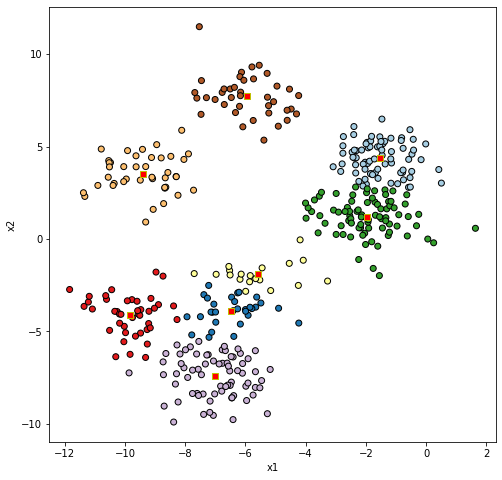

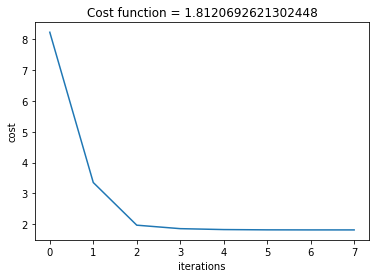

In [13]:
# Testing algorithm
k = 8
mu, c, cluster, J = kmeans(X, k)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Paired, edgecolors='k') # dataset
plt.scatter(mu[:, 0], mu[:, 1], color='r', edgecolors='y', marker='s'); # centroides
plt.xlabel('x1')
plt.ylabel('x2');
plt.show()

plt.plot(J)
plt.title('Cost function = ' + str(J[len(J)-1]))
plt.xlabel('iterations')
plt.ylabel('cost');

## 6.  Plotting how centroids move

n 8 r,c: 2 3


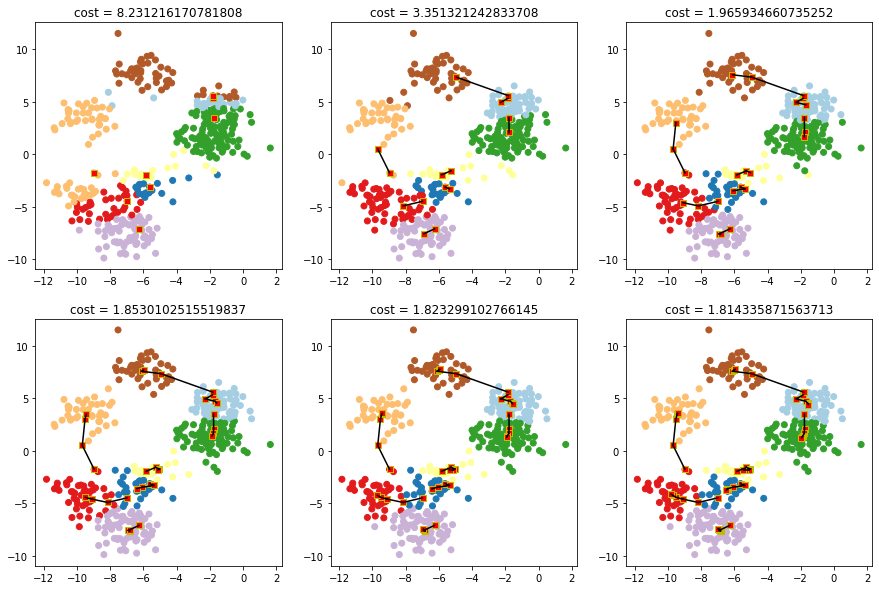

In [14]:
n = len(cluster)
# print(cluster)
cols = 3
rows = int(n / cols)
idx = 0
track = []
print('n', n, 'r,c:', rows, cols)

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))
for i in range(rows):
    img = 0
    for j in range(cols):
        mu, c = cluster[idx]
        track.append(mu)
        axs[i, j].set_title('cost = ' + str(J[idx]))
        axs[i, j].scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Paired)
        p = track[0]
        for t in track:
            axs[i, j].scatter(t[:, 0], t[:, 1], color='r', edgecolors='y', marker='s');
            xx = [p[:, 0], t[:, 0]]
            yy = [p[:, 1], t[:, 1]]
            p = t
            axs[i, j].plot(xx, yy, 'k');
        idx += 1

# Clustering Colors, encoded image 

(200, 226, 4)


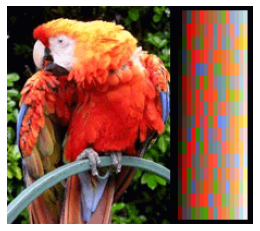

(45200, 4)


In [15]:
import matplotlib.image as mpimg
path = r".\Datasets\VGA_256colors.png" # https://en.wikipedia.org/wiki/Indexed_color
img = mpimg.imread(path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()
pixels = img.reshape(-1, 4)
print(pixels.shape)

### Run K-Means on different k's

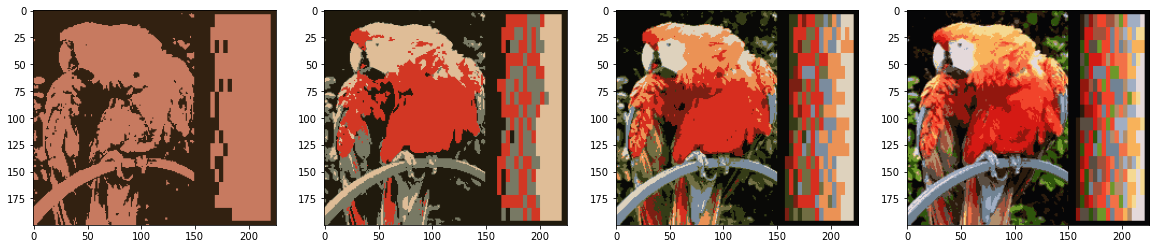

In [16]:
K = [2, 4, 8, 16]
cols = len(K)
rows = 1
fig, axs = plt.subplots(rows, cols, figsize=(20, 5))

idx = 0
for k in K:
    mu, c, cluster, J = kmeans(pixels, k)
    axs[idx].imshow(mu[c].reshape(img.shape))
    
    idx += 1

## Choosing k

Plot the sum of squared errors as a function of `k` and look at where the graph `bends`. As the next figure shows (https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/):

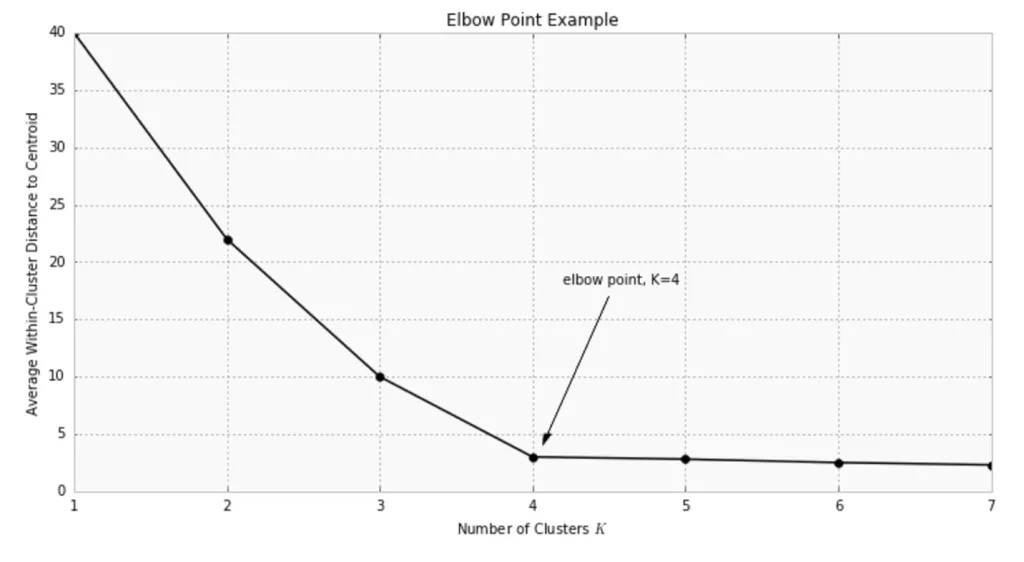

Text(0, 0.5, 'Cost')

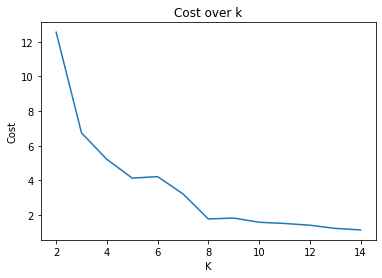

In [17]:
# plot the cost for each k
K = np.arange(2, 15)
Jn = []
idx = 0

for k in K:
    mu, c, cluster, J = kmeans(X, k)
    Jn.append(J[-1])
    idx += 1

plt.plot(K, Jn)
plt.title('Cost over k')
plt.xlabel('K')
plt.ylabel('Cost')